In [55]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# (a)

Generate a data set of 10,000 data points

In [3]:
X = np.random.rand(10000, 2)  # (N, 2)

Construct a 10-partition for the data using the simple greedy heuristic
described in the text.

In [4]:
from numpy import unravel_index
from scipy.spatial import distance


In [39]:
def dist_from_set(X, centers):
    dist = distance.cdist(centers, X)  # (p, N)
    dist_min = dist.min(axis=0)  # (N,)
    _ind = dist_min.argmax()
    return dist_min.max(), _ind

In [44]:
class Cluster:
    def __init__(self, points, label=None):
        self.points = points
        self.label = label
        self.centroid = points.mean(axis=0)
        self.radius = np.max(distance.cdist(points, [self.centroid]))

In [45]:
# select a random point
num_partition = 10
centers = np.random.rand(num_partition, 2)  # (p, 2)
center = X[np.random.choice(X.shape[0])]
centers[:] = center

# print(0, center)
for i in range(1, num_partition):
    # calculate the distance from each point to the center
    dist_set, _ind = dist_from_set(X, centers)
    center = X[_ind]
    centers[i] = center

    # print(i, center)



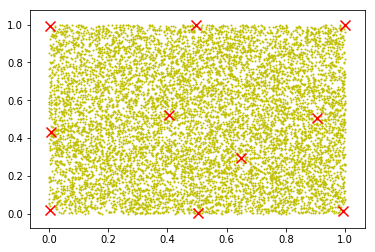

In [46]:
# plot the center and data
plt.scatter(X[:, 0], X[:, 1], c='y', s=1)
plt.scatter(centers[:, 0], centers[:, 1], c='r', marker='x', s=100)

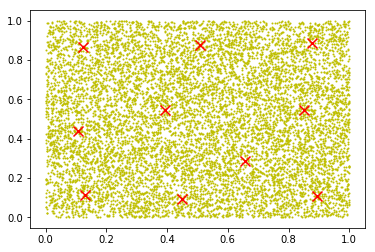

In [47]:
# Voronoi cluster
dist = distance.cdist(centers, X)  # (p, N)
nearest_ind = dist.argmin(axis=0)  # (N,)

Clusters = []

for i in range(num_partition):
    centers[i] = X[nearest_ind == i].mean(axis=0)

    Clusters.append(Cluster(X[nearest_ind == i], label=i))

    # print(i, centers[i])

# plot the center and data
plt.scatter(X[:, 0], X[:, 1], c='y', s=1)
plt.scatter(centers[:, 0], centers[:, 1], c='r', marker='x', s=100)

# (b) 
Run-time using brute force

In [59]:
import time

In [14]:
# Generate 10,000 random query points 
X_query = np.random.rand(10000, 2)

In [57]:
def calc_min_dis(query, points):
    _min = np.inf
    for point in points:
        _dist = distance.euclidean(query, point)
        if _dist < _min:
            _min = _dist
    return _min

In [60]:
# Brute force
start = time.time()

labels = np.zeros(X_query.shape[0])
for i, query in enumerate(X_query):
    _min = np.inf
    for j, point in enumerate(X):
        _dist = distance.euclidean(query, point)
        if _dist < _min:
            _min = _dist
            labels[i] = j

time_passed = time.time() - start
print('Time passed:', time_passed)

Time passed: 704.6433401107788


In [58]:
# Branch and bound
start = time.time()
labels = np.zeros(X_query.shape[0])
for i, query in enumerate(X_query):
    info_min = [np.inf, -1]  # (dist, cluster_ind)
    for cluster in Clusters:
        dis = np.linalg.norm(cluster.centroid - query)
        if dis < info_min[0]:
            info_min = [dis, cluster.label]
    
    min_dis = calc_min_dis(query, Clusters[info_min[1]].points)

    for cluster in Clusters:
        if cluster.label != info_min[1]:
            tmp_dis = np.linalg.norm(query - cluster.centroid) - cluster.radius
            if tmp_dis < min_dis:
                # now the min dis might be in tmp_dis
                # tmp_min = distance.cdist(query[None], cluster.points).min()
                tmp_min = calc_min_dis(query, cluster.points)
                if tmp_min < min_dis:
                    min_dis = tmp_min
                    info_min = [min_dis, cluster.label]
    labels[i] = info_min[1]

time_passed = time.time() - start
print('Time passed:', time_passed)